In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd



In [2]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [4]:
df['Month']=pd.to_datetime(df['Month'])

In [5]:
df.set_index('Month',inplace=True)

In [6]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

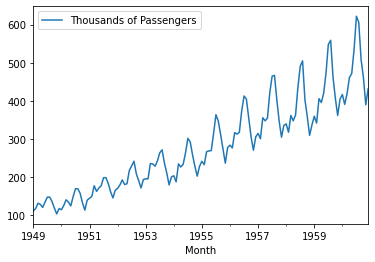

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis data is non-stationary ")

In [11]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060543
p- value: 0.9918802434376411
weak evidence against null hypothesis data is non-stationary 


In [12]:
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [13]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value: 0.054213290283824954
weak evidence against null hypothesis data is non-stationary 


In [14]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [15]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468488
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

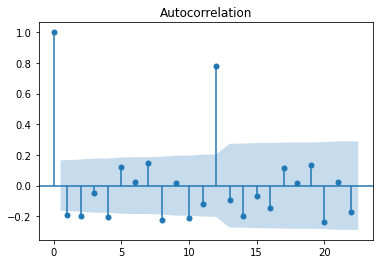

In [17]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

C:\Users\navod\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


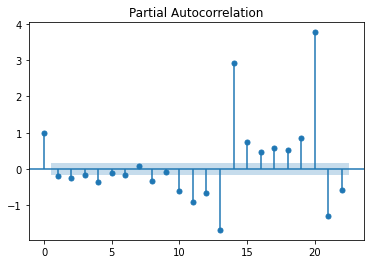

In [18]:
pacf = plot_pacf(df["Passengers Second Difference"].dropna())

In [19]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [20]:
stepwise_fit = auto_arima(df["Passengers Second Difference"].dropna(),d=2, suppress_warnings=True)       

In [53]:
stepwise_fit.order


(5, 2, 0)

In [22]:
from datetime import datetime,timedelta
train_end=datetime(1958,12,1)
test_end=datetime(1960,12,1)

In [23]:
train_data=df[:train_end]
test_data=df[train_end:test_end]

In [24]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]



In [25]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1958-12-01,337,27.0,76.0
1959-01-01,360,23.0,-4.0
1959-02-01,342,-18.0,-41.0
1959-03-01,406,64.0,82.0
1959-04-01,396,-10.0,-74.0
1959-05-01,420,24.0,34.0
1959-06-01,472,52.0,28.0
1959-07-01,548,76.0,24.0
1959-08-01,559,11.0,-65.0


In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model=ARIMA(df['Thousands of Passengers'],order=(5,2,0))

In [28]:
model=model.fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                  142
Model:                         ARIMA(5, 2, 0)   Log Likelihood                -704.048
Method:                               css-mle   S.D. of innovations             34.323
Date:                        Wed, 04 May 2022   AIC                           1422.097
Time:                                21:23:24   BIC                           1442.787
Sample:                            03-01-1949   HQIC                          1430.504
                                 - 12-01-1960                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.1327      1.089     -0.122      0.903      -2.268       2.002
ar.L1.D2.Thousands of Passengers    -0.3852      0.085     -4.557      0.000      -0.551      -0.220
ar.L2.D2.Thousands of Passengers    -0.4431      0.085     -5.210      0.000      -0.610      -0.276
ar.L3.D2.Thousands of Passengers    -0.3195      0.089     -3.595      0.000      -0.494      -0.145
ar.L4.D2.Thousands of Passengers    -0.4173      0.086     -4.861      0.000      -0.586      -0.249
ar.L5.D2.Thousands of Passengers    -0.1118      0.088     -1.268      0.205      -0.284       0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6215           -1.0358j            1.2079           -0.1640
AR.2            0.6215           +1.0358j            1.2079            0.1640
AR.3           -0.8844           -1.0627j            1.3825           -0.3605
AR.4           -0.8844           +1.0627j            1.3825            0.3605
AR.5           -3.2083           -0.0000j            3.2083           -0.5000
-----------------------------------------------------------------------------
"""

In [30]:
pred=model.predict(start=pred_start_date,end=pred_end_date)


In [31]:
test_data['Predicted_ARIMA']=pred

<AxesSubplot:xlabel='Month'>

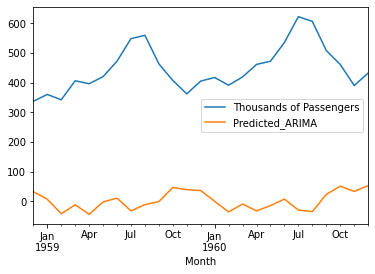

In [32]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [33]:
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [34]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


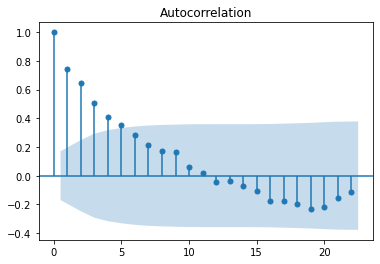

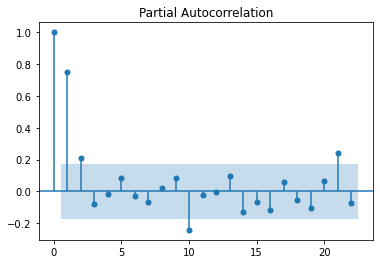

In [35]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [38]:
model_SARIMA_fit=model_SARIMA.fit()

In [39]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)

In [40]:
test_data['Predicted_SARIMA']=pred_Sarima

<AxesSubplot:xlabel='Month'>

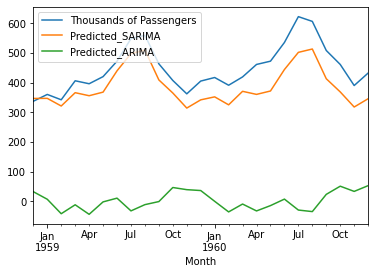

In [41]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()